# 2020-1 Distributed Machine Learning
## 수강능력시험

1. 정답은 마크다운으로 작성, 화요일 23시 59분까지 분산머신러닝처리 repository에 pull request 할 수 있도록 합니다.(Answer_Q1_학번(사번).md)
2. 인터넷을 찾아보지 않고, 최대한 자기 실력으로 문제를 풀어 주시기 바랍니다
3. To be Honest!

### Q1. 다음 코드를 작동할 수 있도록 고치시오
 - Hint : Text Mining의 데이터 분석 프로세스

In [8]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

categories = [
    'alt.atheism',
    'talk.religion.misc',
]
data = fetch_20newsgroups(subset='train', categories=categories)

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    
    ('clf', SGDClassifier()),
])

parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'clf__max_iter': (20,),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

grid_search.fit(data.data, data.target)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.2min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        p

### Q2. 신민철은 최근에 SVM을 이용하여 붓꽃 분류 모델을 작성 후 공유하였다. 완성된 머신 러닝 모델을 불러와서 시험해보세요
- smc_iris_model.joblib 파일을 불러와서 iris data에서 predict를 진행해보세요.
- iris 데이터를 다운로드 받는 코드
> from sklearn import datasets<br>
X, y = datasets.load_iris(return_X_y=True)

In [14]:
from sklearn import datasets
X, y = datasets.load_iris(return_X_y=True)

from sklearn.externals import joblib

obj = joblib.load('smc_iris_model.joblib')
obj.predict(X)

C:\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator SVC from version 0.22 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

### Q3. 신민철은 영화 박스오피스 데이터를 수집하기 위해, 영화진흥위원회 OPENAPI를 이용하여 데이터를 수령하기로 하였습니다. 제공되는 설명을 읽고 API 에서 2019년 12월 1일부터 12월 31일까지의 박스오피스 데이터를 받아 데이터프레임 형태로 수집하세요

* 주소 : http://www.kobis.or.kr/kobisopenapi/homepg/apiservice/searchServiceInfo.do?serviceId=searchMovieList
(가입이 필요합니다)

* 요청 시 주의할 파라미터: repNationCd = 'K'(한국 영화만 조회하세요)

* 완성된 데이터프레임의 header : movieNm(영화이름), showRange(박스오피스 조회 일자), salesAmt(해당 일의 매출액), audiCnt(일일 관객 수), scrnCnt(스크린 수)

In [13]:
import requests, json
import datetime
import urllib
import pandas as pd

movie = []
for i in range(20191201,20191232):
    tmpDate=str(i)
    url="http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=9a1e03ae8a219a6b2bc49a257af28dd9&targetDt="+tmpDate+"&repNationCd=K"
    res=requests.get(url)
    text=res.text
    d=json.loads(text)

    for b in d['boxOfficeResult']['dailyBoxOfficeList']:
        movie.append([b['movieNm'],tmpDate,b['salesAmt'],b['audiCnt'],b['scrnCnt']])

    
data= pd.DataFrame(movie,columns=['영화이름','박스오피스 조회 일자','매출액','일일 관객수','스크린 수'])
data

## showRange가 안 불러와져서 임의로 넣었습니다...

,영화이름,박스오피스 조회 일자,매출액,일일 관객수,스크린 수
0,나를 찾아줘,20191201,930737920,105781,781
1,블랙머니,20191201,708640460,81335,721
2,신의 한 수: 귀수편,20191201,37039580,4223,107
3,82년생 김지영,20191201,35917580,4111,117
4,윤희에게,20191201,31966100,3790,71
5,카센타,20191201,16619020,2026,121
6,웃는남자 감독판,20191201,15910500,1223,18
7,집 이야기,20191201,6174880,744,61
8,대통령의 7시간,20191201,3835220,490,15
9,행동하는 양심 김대중,20191201,3210500,376,84


### Q4. 파이썬에서 모듈과 클래스의 차이는 무엇인가요? 한 마디로 설명해 주세요.

클래스는 변수, 함수를 가지며 객체를 만들어내는 틀이고 모듈은 클래스, 함수, 변수를 모두 모아둔 것입니다.

### Q5. AWS EC2, Google Cloud Compute Engine, MS Azure VMs 중 한 곳에 자신의 컴퓨팅 노드를 만들고, 쉘에 접속한 사진을 찍어서 같이 업로드해주세요.
**(과금주의!!!)반드시 사진을 찍은 후에는 만든 VM을 삭제하셔야 과금되지 않습니다.**

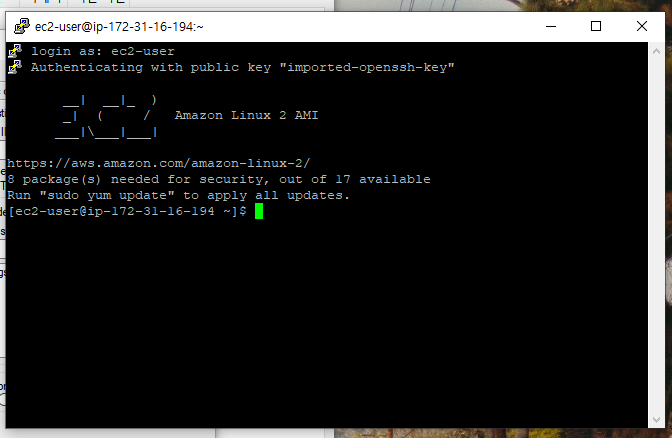